In [8]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [9]:
#------------------------------------------------------#
# Freestream Velocity Field
u_inf=1.0 #freestream speed, u_infinity
u_freestream=u_inf*numpy.ones((N,N),dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)
# Stream-Function
psi_freestream=u_inf*Y
#------------------------------------------------------#
def joukowski_transform(zeta):
    """
     Arguments
        zeta:complex coordinates
        Output:
        z:complex coordinates
    """
    z = numpy.empty_like(zeta)
    z = zeta + (1/zeta) 
    return z
#------------------------------------------------------#
def get_velocity_doublet(strength, xd, yd, X, Y):
    """Returns the velocity field generated by a doublet.
     Arguments
        strength -- strength of the doublet.
        xd, yd -- coordinates of the doublet.
        X, Y -- mesh grid.
    """
    u_doublet = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v_doublet = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u_doublet, v_doublet
#------------------------------------------------------#
def get_stream_function_doublet(strength, xd, yd, X, Y):
    """Returns the stream-function generated by a doublet.
     Input:
        strength -- strength of the doublet.
        xd, yd -- coordinates of the doublet.
        X, Y -- mesh grid.
    """
    psi_doublet = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi_doublet
#------------------------------------------------------#
def get_velocity_sourcesink(strength,xs,ys,X,Y):
    """Returns the velocity field generated by a source/sink.
     Arguments
      strength-->strength of the source/sink.
      xs,ys-->coordinates of the source/sink.
      X,Y-->mesh grid.
      """
    u_sourcesink=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v_sourcesink=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u_sourcesink,v_sourcesink
#------------------------------------------------------#
def get_stream_function_sourcesink(strength,xs,ys,X,Y):
    """Returns the stream-function generated by a source/sink.
     Arguments-->
      strength-->strength of the source/sink.
      xs,ys-->coordinates of the source/sink.
      X,Y-->mesh grid.
      """
    psi_sourcesink=strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi_sourcesink
#------------------------------------------------------#
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
     Arguments-->
        strength -- strength of the vortex.
        xv, yv -- coordinates of the vortex.
        X, Y -- mesh grid.
    """
    u_vortex = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v_vortex = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u_vortex, v_vortex
#------------------------------------------------------#
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi_vortex = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi_vortex
#------------------------------------------------------#

In [10]:
x0, y0, r = -0.2, 0.0, 1.2
xcircle = numpy.linspace(-r,r,N)+x0
y_up = numpy.sqrt(r**2 - (xcircle-x0)**2)
y_down = -numpy.sqrt(r**2 - (xcircle-x0)**2)

xcomb = numpy.concatenate([xcircle, xcircle]) 
ycomb = numpy.concatenate([y_up, y_down])
coords = numpy.vstack((xcomb, ycomb))

zeta = numpy.empty_like(coords, dtype=complex)
zeta.real = coords[0,:]
zeta.imag = coords[1,:]
z = joukowski_transform(zeta)
x = z.real
y = z.imag

#Free Stream Calculated Above
#Doublet Input
u_doublet, v_doublet=get_velocity_doublet(1.0,x0,y0,X,Y)
psi_doublet=get_stream_function_doublet(1.0,x0,y0,X,Y)
#Vortex Input
u_vortex, v_vortex= get_velocity_vortex(1.0,0.0,0.0,X,Y)
psi_vortex=get_stream_function_vortex(1.0,0.0,0.0,X,Y)
#Superposition
u = (u_freestream + u_doublet + u_vortex)
v = (v_freestream + v_doublet + v_vortex)
zeta2 = numpy.empty_like(X, dtype=complex)
zeta2.real = u
zeta2.imag = v
z2 = joukowski_transform(zeta2)

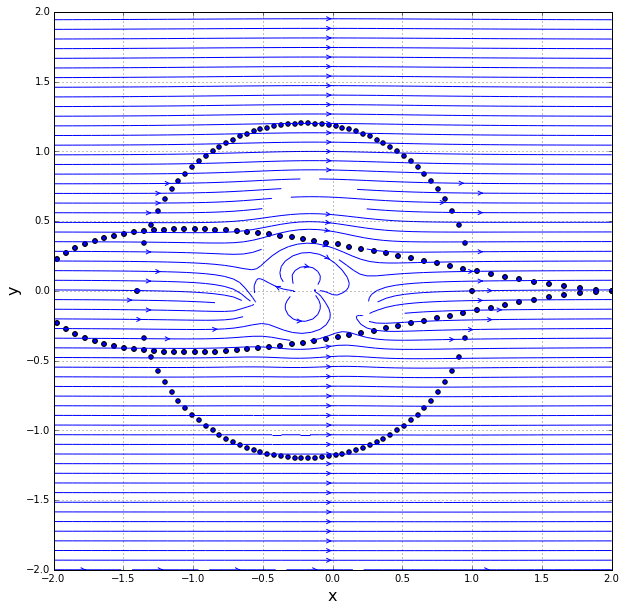

In [11]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.grid(which='both', axis='both')
pyplot.scatter(x, y)
pyplot.scatter(coords[0,:], coords[1,:])
pyplot.streamplot(X, Y, z2.real, z2.imag, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

In [12]:
print z2

[[ 2.00109925-0.00141669j  2.00117160-0.00137366j  2.00123969-0.00132368j
  ...,  2.00151834+0.00186267j  2.00138474+0.00189867j
   2.00125409+0.00192206j]
 [ 2.00114024-0.00149461j  2.00122038-0.00144779j  2.00129585-0.00139265j
  ...,  2.00156005+0.00200444j  2.00141254+0.00203752j
   2.00126932+0.0020567j ]
 [ 2.00118442-0.00158112j  2.00127381-0.00153027j  2.00135818-0.00146945j
  ...,  2.00159892+0.00216159j  2.00143600+0.00219029j
   2.00127904+0.00220372j]
 ..., 
 [ 1.99754858+0.00534618j  1.99767939+0.00580548j  1.99786100+0.00629378j
  ...,  1.99796847-0.00521359j  1.99786617-0.00483414j
   1.99779480-0.00447913j]
 [ 1.99797173+0.0052239j   1.99812857+0.00563755j  1.99833368+0.0060722j
  ...,  1.99834192-0.00508291j  1.99821802-0.00473682j
   1.99812463-0.0044101j ]
 [ 1.99835375+0.00507819j  1.99852959+0.00544841j  1.99875059+0.00583295j
  ...,  1.99867990-0.00493377j  1.99853944-0.00462004j
   1.99842856-0.0043212j ]]


In [13]:
print z2.real

[[ 2.00109925  2.0011716   2.00123969 ...,  2.00151834  2.00138474
   2.00125409]
 [ 2.00114024  2.00122038  2.00129585 ...,  2.00156005  2.00141254
   2.00126932]
 [ 2.00118442  2.00127381  2.00135818 ...,  2.00159892  2.001436
   2.00127904]
 ..., 
 [ 1.99754858  1.99767939  1.997861   ...,  1.99796847  1.99786617
   1.9977948 ]
 [ 1.99797173  1.99812857  1.99833368 ...,  1.99834192  1.99821802
   1.99812463]
 [ 1.99835375  1.99852959  1.99875059 ...,  1.9986799   1.99853944
   1.99842856]]
